<html> <h1 style="font-style:bold; color:blue;"> Neural Computing and Deep Learning </h1> </html>

<html> <h1 style="font-style:italic; color:blue;"> Week-6 </h1> </html>

<html> <h2 style="font-style:italic; color:blue;"> RNN for Time Series </h2> </html>


RNNs are used for sequence modelling. This tutorial will look at time series data to be modelled and predicted using RNNs. 

In [88]:
# Import Libraries (pandas, numpy, matplotlib)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Data

We will use retail data for time-series modeling. 

Link to the dataset:
 https://fred.stlouisfed.org/series/MRTSSM448USN

Information about the Advance Monthly Retail Sales Survey can be found on the Census website at:
https://www.census.gov/retail/marts/about_the_surveys.html

Release: Advance Monthly Sales for Retail and Food Services  
Units:  Millions of Dollars, Not Seasonally Adjusted
Frequency:  Monthly

Suggested Citation:
U.S. Census Bureau, Advance Retail Sales: Clothing and Clothing Accessory Stores [RSCCASN], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/RSCCASN, January 25, 2025.



##### Read data first -  Use index_col = 'DATE' and 'parse_dates = True' as a parameter.

_________________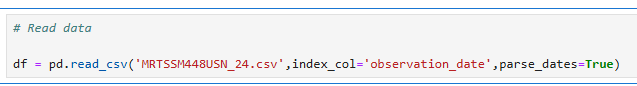

In [89]:
df=pd.read_csv('MRTSSM448USN_24.csv', index_col='observation_date', parse_dates=True)

In [90]:
# Print the first few rows of data
df.head()

,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,MRTSSM448USN
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


_______________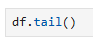

In [91]:
df.tail()

,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


,MRTSSM448USN
observation_date,
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318
2024-11-01,29762
2024-12-01,41199


Does the sales column has any name?

If no, set the name of the colum as 'Sales'.

In [92]:
# Set name of column as 'Sales'. Use - df.columns 

df.columns=['Sales']
df.head()

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558


Plot your data - Year vs Sales

hint: use df.plot  and plt.show()

____________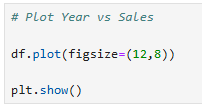

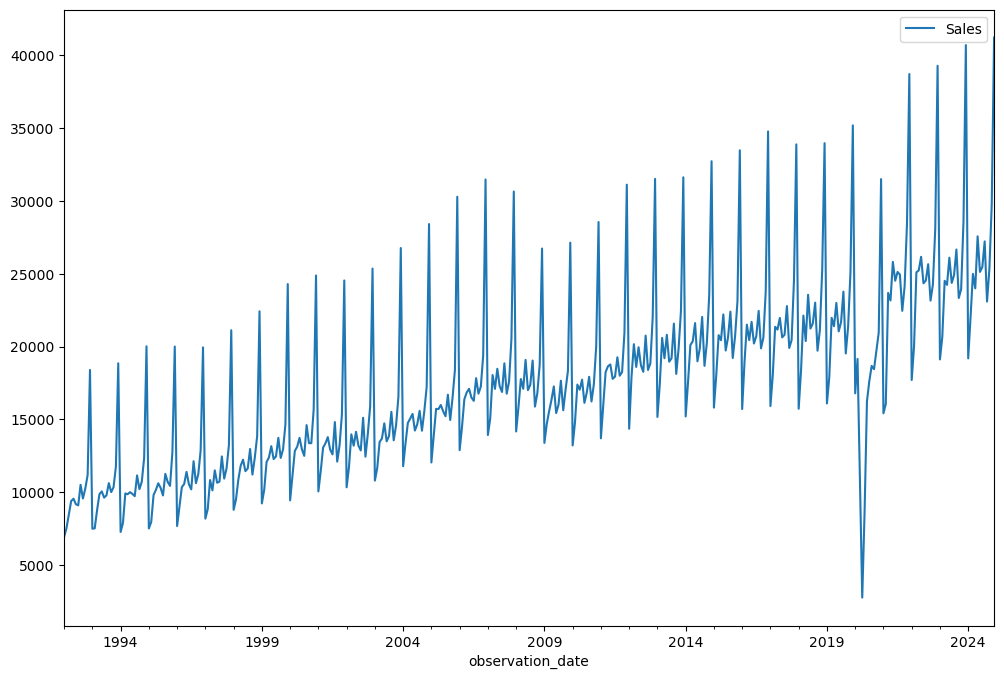

In [93]:
df.plot(figsize=(12,8))
plt.show()

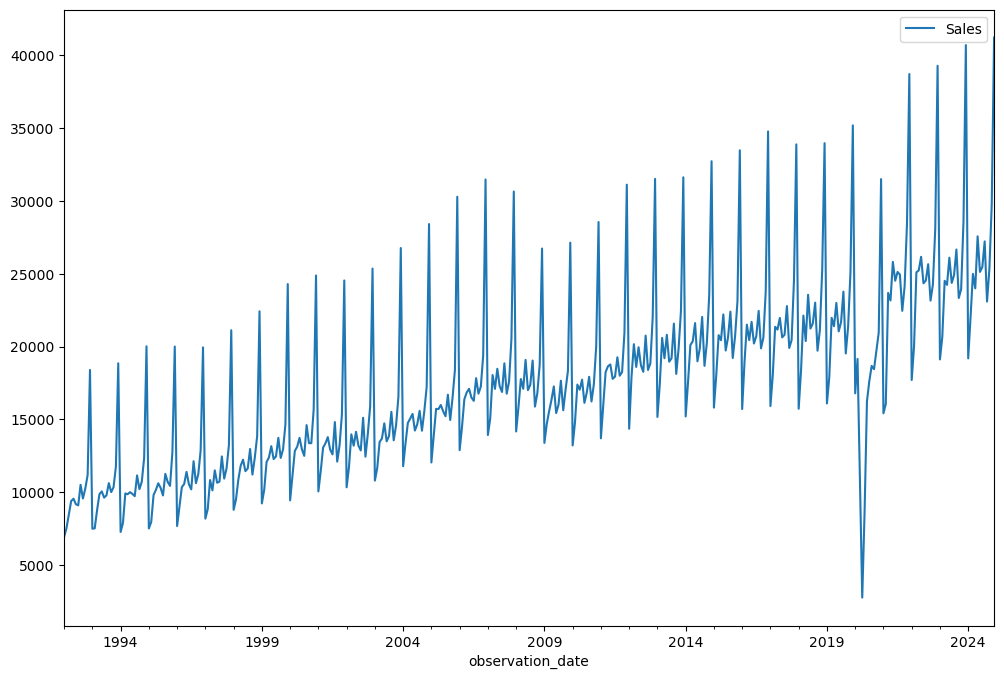

### Train Test Split 

We will use the last 1.5 years (18 months) samples for testing. The rest is for training

______________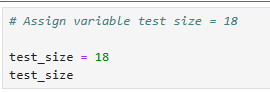

In [94]:
test_size=18
test_size

18

18

__________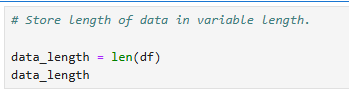

In [95]:
data_length=len(df)
data_length

396

396

__________________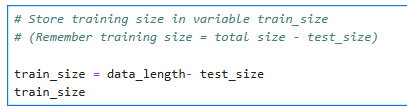

In [96]:
train_size=data_length-test_size
train_size

378

378

Now, we will find the indexes of the test data. Remember, these are the last 18 indexes in the pandas dataframe.

____________________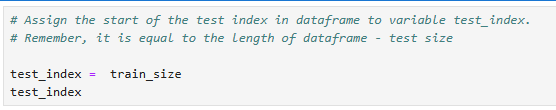

In [97]:
test_index= train_size
test_index

378

378

Next, we will separate train and test datasets.

_________________________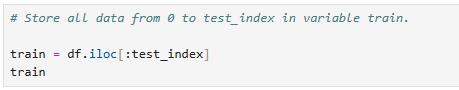

In [98]:
train=df.iloc[:test_index]
train

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2023-02-01,20666
2023-03-01,24510
2023-04-01,24232


In [99]:
# Store everything from test_index to the last sample in the test variable 
# Hint - Use df.iloc

test=df.iloc[test_index:]
test

,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


,Sales
observation_date,
2023-07-01,24911
2023-08-01,26657
2023-09-01,23332
2023-10-01,23933
2023-11-01,28580
2023-12-01,40684
2024-01-01,19188
2024-02-01,22005
2024-03-01,24986


In [100]:
# Print the size of the train data


# Print the size of the test data

print(train_size,test_size)


378 18


18

### In Neural Networks, we need to Scale Data between 0-1

___________________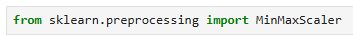

In [101]:
from sklearn.preprocessing import MinMaxScaler

In [102]:
scaler= MinMaxScaler()
scaler.fit(train)

MinMaxScaler()

_______________________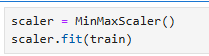

MinMaxScaler()

__________________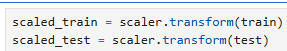

In [103]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

In [104]:
# Check if the data has been scaled properly
# Print max and min for train and test

print(scaled_test.max())
print(scaled_test.min())
print(scaled_train.max())
print(scaled_train.min())
# ...
# ...

1.0530599939704552
0.44980403979499545
1.0
0.0


1.0
1.0530599939704552
0.0
0.44980403979499545


## Time Series Generator

This class takes in a sequence of data points gathered at
equal intervals, along with time series parameters such as
stride, length of history, etc., to produce batches for
training/validation.

#### Arguments
    data: Indexable generator (such as list or Numpy array)
        containing consecutive data points (timesteps).
        The data should be at 2D, and axis 0 is expected
        to be the time dimension.
    targets: Targets corresponding to timesteps in `data`.
        It should have same length as `data`.
    length: Length of the output sequences (in number of timesteps).
    sampling_rate: Period between successive individual timesteps
        within sequences. For rate `r`, timesteps
        `data[i]`, `data[i-r]`, ... `data[i - length]`
        are used for create a sample sequence.
    stride: Period between successive output sequences.
        For stride `s`, consecutive output samples would
        be centered around `data[i]`, `data[i+s]`, `data[i+2*s]`, etc.
    start_index: Data points earlier than `start_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    end_index: Data points later than `end_index` will not be used
        in the output sequences. This is useful to reserve part of the
        data for test or validation.
    shuffle: Whether to shuffle output samples,
        or instead draw them in chronological order.
    reverse: Boolean: if `true`, timesteps in each output sample will be
        in reverse chronological order.
    batch_size: Number of timeseries samples in each batch
        (except maybe the last one).

### We will use 12 months as input and then predict the next month out


_____________________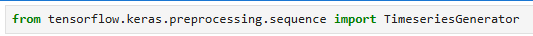

In [105]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [70]:
#TimeseriesGenerator?

_________________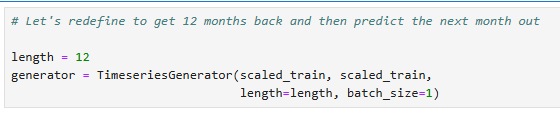

In [106]:
length=12
generator= TimeseriesGenerator(scaled_train, scaled_train,
                              length=length, batch_size=1)

_______________________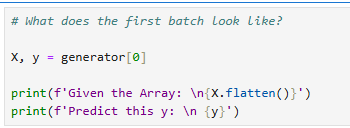

In [107]:
x,y= generator[0]
print(f'Given the Array: \n{x.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


Given the Array: 
[0.11406802 0.13012854 0.15619262 0.18157152 0.18587442 0.17556938
 0.17340423 0.21204813 0.18628553 0.20494971 0.23052046 0.42807027]
Predict this y: 
 [[0.12952558]]


### Create the Model

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import GRU

import tensorflow as tf

________________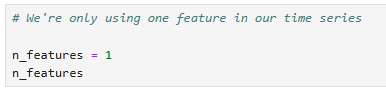

In [109]:
n_features=1
n_features

1

1

## Define your own models. 

Use 1. SimpleRNN, LSTM, or GRU neural network.

APIs:
https://keras.io/api/layers/recurrent_layers/

In [110]:
# Your code to create your own model
# use input_shape=(length, n_features)
# use model.add(Dense(1)) because it is the regression task
 
model= Sequential()
model.add(GRU(150, activation='tanh', input_shape=(length, n_features)))
model.add(Dense(100, activation='gelu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [111]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_1 (GRU)                     │ (None, 150)            │        68,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,051 (347.86 KB)

 Trainable params: 89,051 (347.86 KB)

 Non-trainable params: 0 (0.00 B)

_____________________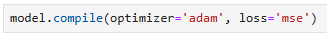

In [112]:
model.compile(optimizer='adam', loss='mse')

### EarlyStopping and creating a Validation Generator

NOTE: The scaled_test dataset size MUST be greater than your length chosen for your batches. 

Review the video on the Week-6 page for more info on this.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 2 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [113]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, 
                                           length=length, batch_size=1)

In [39]:
from tensorflow.keras.callbacks import EarlyStopping

In [114]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=8)


_____________________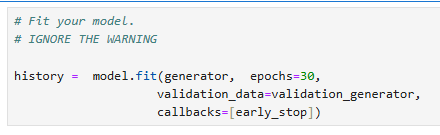

In [115]:
history= model.fit(generator, epochs=30,
                  validation_data=validation_generator,
                  callbacks=[early_stop])

C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - loss: 0.0302 - val_loss: 0.0474
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0192 - val_loss: 0.0440
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0204 - val_loss: 0.0392
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.0137 - val_loss: 0.0298
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0176 - val_loss: 0.0415
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0157 - val_loss: 0.0278
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0124 - val_loss: 0.0390
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0132 - val_loss: 0.0269
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0122 - val_loss: 0.0263
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0158 - val_loss: 0.0178
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0075 - val_loss: 0.0266
Epoch 12/30
366/366 ━━━━━━━━━━━━━━━━━━━━

C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - loss: 0.0364 - val_loss: 0.0283
Epoch 2/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0124 - val_loss: 0.0153
Epoch 3/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.0118 - val_loss: 0.0010
Epoch 4/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step - loss: 0.0068 - val_loss: 0.0032
Epoch 5/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - loss: 0.0047 - val_loss: 0.0127
Epoch 6/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 0.0079 - val_loss: 0.0011
Epoch 7/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0037 - val_loss: 0.0011
Epoch 8/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0043 - val_loss: 0.0015
Epoch 9/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0046 - val_loss: 0.0026
Epoch 10/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0042 - val_loss: 6.1039e-04
Epoch 11/30
366/366 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.0049 - val_loss: 6.4973e-04
Epoch 12/30
366/366 ━━━━━━━━━━━━

_____________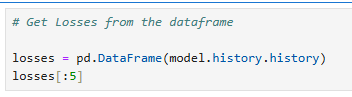

In [116]:
losses=pd.DataFrame(model.history.history)
losses[:5]

,loss,val_loss
0,0.020945,0.047387
1,0.017484,0.044005
2,0.017398,0.039242
3,0.015855,0.029822
4,0.015163,0.041512


In [124]:
# the values may be different


,loss,val_loss
0,0.020090,0.028262
1,0.012648,0.015266
2,0.010198,0.001036
3,0.006880,0.003225
4,0.005237,0.012703


___________________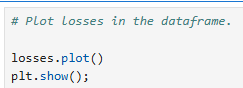

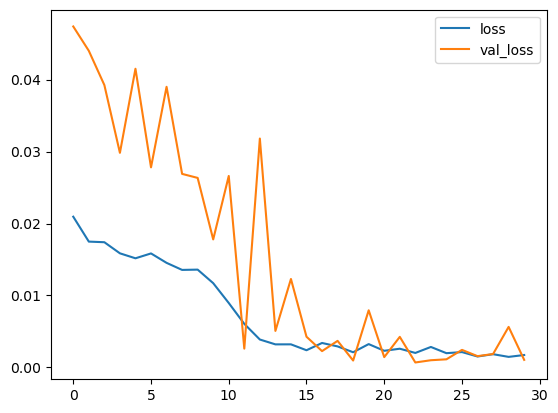

In [117]:
losses.plot()
plt.show()

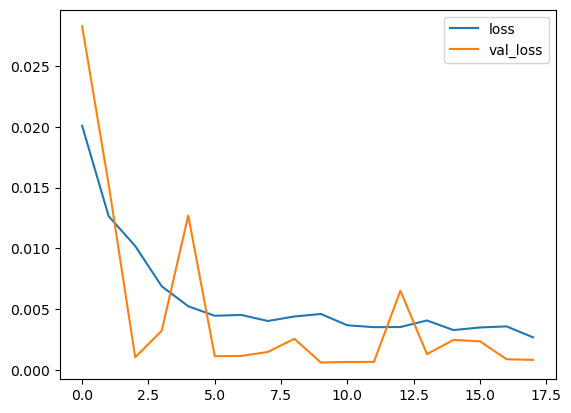

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

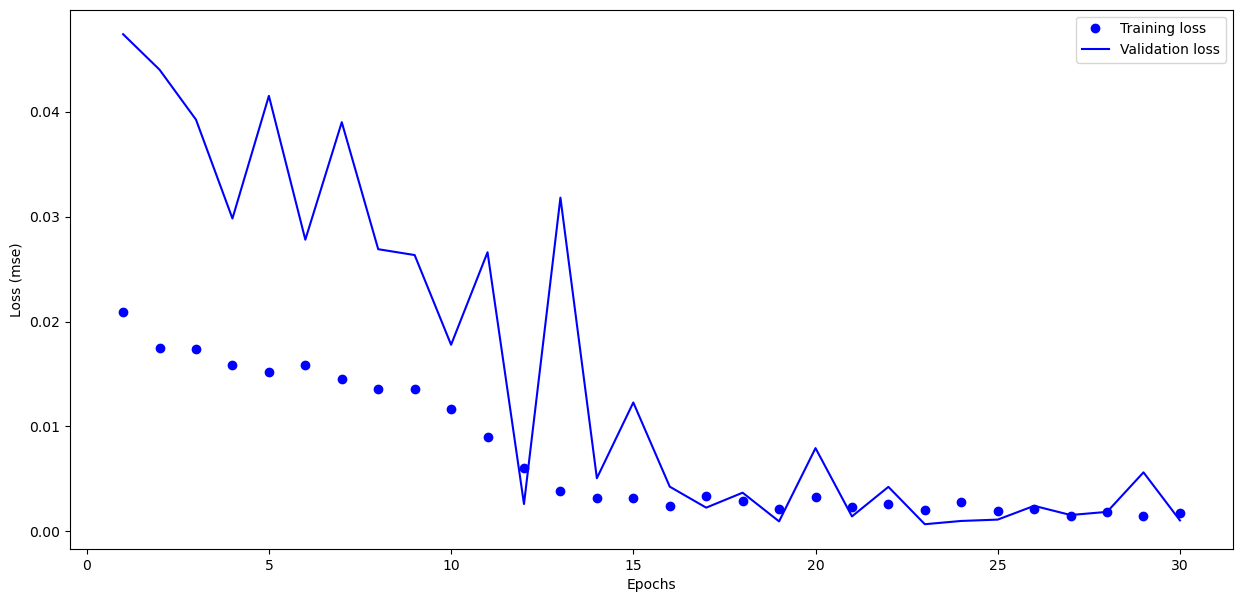

In [118]:
# print Loss for the neural network training process

history_dict = history.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

### Evaluate on Test Data

____________________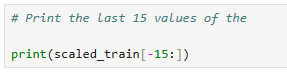

In [119]:
print(scaled_train[-15:])

[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


[[0.61523282]
 [0.64077617]
 [0.5909502 ]
 [0.59621235]
 [0.62693562]
 [0.55844547]
 [0.58834653]
 [0.69254803]
 [1.        ]
 [0.44788555]
 [0.49031162]
 [0.59566421]
 [0.58804506]
 [0.63913175]
 [0.59166278]]


____________________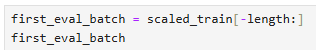

In [120]:
first_eval_batch=scaled_train[-length:]
first_eval_batch

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

array([[0.59621235],
       [0.62693562],
       [0.55844547],
       [0.58834653],
       [0.69254803],
       [1.        ],
       [0.44788555],
       [0.49031162],
       [0.59566421],
       [0.58804506],
       [0.63913175],
       [0.59166278]])

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [121]:
n_input = 12
first_eval_batch = first_eval_batch.reshape((1, n_input, n_features))
first_eval_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

___________________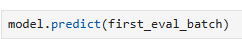

In [122]:
model.predict(first_eval_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 499ms/step


array([[0.59332436]], dtype=float32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 802ms/step


array([[0.63285655]], dtype=float32)

_________________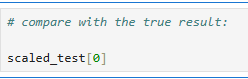

In [123]:
scaled_test[0]

array([0.60665442])

array([0.60665442])

#### Try predicting the series!

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [124]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

current_batch

array([[[0.59621235],
        [0.62693562],
        [0.55844547],
        [0.58834653],
        [0.69254803],
        [1.        ],
        [0.44788555],
        [0.49031162],
        [0.59566421],
        [0.58804506],
        [0.63913175],
        [0.59166278]]])

In [125]:
for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for 
    # grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


In [126]:
test_predictions

[array([0.59332436], dtype=float32),
 array([0.616915], dtype=float32),
 array([0.552802], dtype=float32),
 array([0.55656123], dtype=float32),
 array([0.6592408], dtype=float32),
 array([1.0408602], dtype=float32),
 array([0.36968067], dtype=float32),
 array([0.45332134], dtype=float32),
 array([0.56129044], dtype=float32),
 array([0.5353584], dtype=float32),
 array([0.6252154], dtype=float32),
 array([0.63710827], dtype=float32),
 array([0.6472749], dtype=float32),
 array([0.6435021], dtype=float32),
 array([0.5713227], dtype=float32),
 array([0.5823654], dtype=float32),
 array([0.702377], dtype=float32),
 array([1.0992103], dtype=float32)]

### Inverse Transformations and Compare

_________________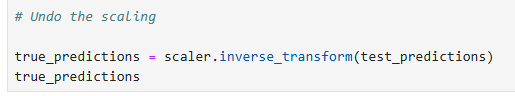

In [127]:
true_predictions= scaler.inverse_transform(test_predictions)
true_predictions

array([[24424.62604123],
       [25285.37715125],
       [22946.08753258],
       [23083.24965787],
       [26829.71842235],
       [40753.86524487],
       [16264.53871152],
       [19316.33564866],
       [23255.80439168],
       [22309.62299728],
       [25588.23470795],
       [26022.16931444],
       [26393.11969239],
       [26255.46171391],
       [23621.85060763],
       [24024.76611769],
       [28403.63037664],
       [42882.88484049]])

array([[25867.03686076],
       [26708.37140393],
       [25016.20063967],
       [25854.56223851],
       [29340.47320271],
       [40268.42497611],
       [20830.97139931],
       [22252.6564256 ],
       [25053.23304337],
       [25580.6207518 ],
       [27142.1950959 ],
       [26136.75054663],
       [27203.31552541],
       [27836.48089719],
       [26630.20928335],
       [27364.5308798 ],
       [30701.01822633],
       [41377.06135786]])

_____________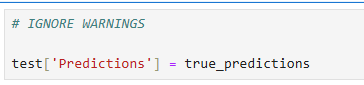

In [128]:
test['Predictions']= true_predictions

C:\Users\User\AppData\Local\Temp\ipykernel_139248\715416204.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions']= true_predictions


C:\Users\vital\AppData\Local\Temp\ipykernel_18288\3095654106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


### Check and plot predictions

In [129]:
# Print the test variable

test

,Sales,Predictions
observation_date,,
2023-07-01,24911,24424.626041
2023-08-01,26657,25285.377151
2023-09-01,23332,22946.087533
2023-10-01,23933,23083.249658
2023-11-01,28580,26829.718422
2023-12-01,40684,40753.865245
2024-01-01,19188,16264.538712
2024-02-01,22005,19316.335649
2024-03-01,24986,23255.804392


,Sales,Predictions
observation_date,,
2023-07-01,24911,25867.036861
2023-08-01,26657,26708.371404
2023-09-01,23332,25016.200640
2023-10-01,23933,25854.562239
2023-11-01,28580,29340.473203
2023-12-01,40684,40268.424976
2024-01-01,19188,20830.971399
2024-02-01,22005,22252.656426
2024-03-01,24986,25053.233043


_______________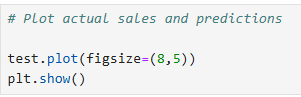

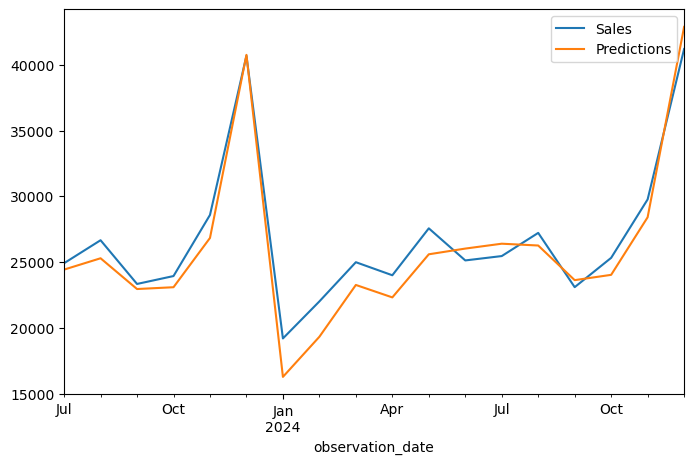

In [130]:
test.plot(figsize=(8,5))
plt.show()

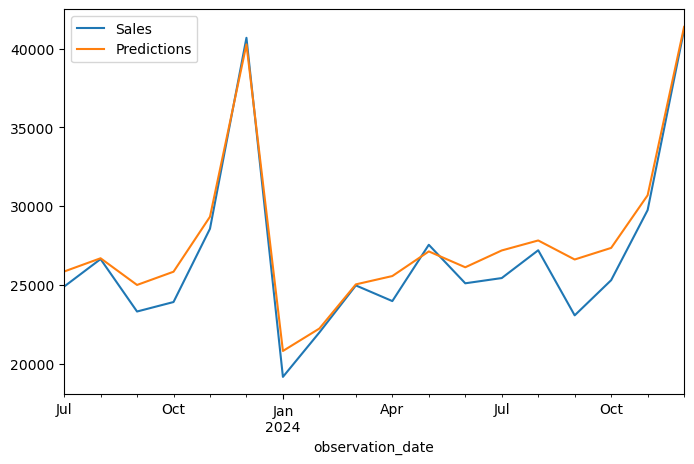

### Retrain and Forecasting

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [131]:
full_scaler = MinMaxScaler()
scaled_full_data = full_scaler.fit_transform(df)

In [132]:
print(scaled_full_data.max())
print(scaled_full_data.min())

1.0
0.0


In [133]:
length = 12 # Length of the output sequences (in number of timesteps)
generator = TimeseriesGenerator(scaled_full_data, 
                                scaled_full_data, length=length, batch_size=1)

In [134]:
# Use any neural network model based on RNN
# You can also use the model created above
#
# Create the model
model2= Sequential()
model2.add(LSTM(150, activation='tanh', input_shape=(length, n_features)))
model2.add(Dense(100, activation='elu'))
model2.add(Dense(50, activation='relu'))
model2.add(Dense(1))

C:\Users\User\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

In [135]:
model2.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 150)            │        91,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 100)            │        15,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 111,401 (435.16 KB)

 Trainable params: 111,401 (435.16 KB)

 Non-trainable params: 0 (0.00 B)

In [136]:
# your code to compile the model

model2.compile(optimizer='adam', loss='mse')

In [202]:
model.compile(optimizer='adam', loss='mse')

In [137]:
# Your code to create an object early-stop

# Use the patience parameter equal to the last digit in your SID.
# If the last digit of your SID = 0, then assign patience=10
# For example, your SID = 22984879, then patience=9

# LAST_DIGIT_IN_YOUR_SID = 

early_stop = EarlyStopping(monitor='val_loss',patience=8)


____________________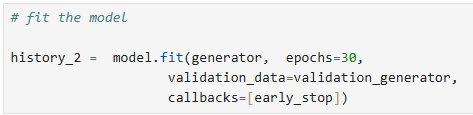

In [138]:
# fit the model

history_2 =  model2.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


C:\Users\User\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - loss: 0.0348 - val_loss: 0.0421
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0124 - val_loss: 0.0315
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0135 - val_loss: 0.0280
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0147 - val_loss: 0.0380
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0119 - val_loss: 0.0647
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0149 - val_loss: 0.0437
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.0125 - val_loss: 0.0512
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0155 - val_loss: 0.0296
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0137 - val_loss: 0.0270
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0122 - val_loss: 0.0252
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.0113 - val_loss: 0.0205
Epoch 12/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/ste

In [207]:
# fit the model

history_2 =  model.fit(generator,  epochs=30,
                    validation_data=validation_generator,
                    callbacks=[early_stop])

Epoch 1/30


C:\Users\vital\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


384/384 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.0338 - val_loss: 0.0284
Epoch 2/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0113 - val_loss: 0.0106
Epoch 3/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0104 - val_loss: 0.0036
Epoch 4/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0056 - val_loss: 0.0116
Epoch 5/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0054 - val_loss: 6.5718e-04
Epoch 6/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0040 - val_loss: 0.0084
Epoch 7/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - loss: 0.0038 - val_loss: 8.4053e-04
Epoch 8/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0055 - val_loss: 0.0159
Epoch 9/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0051 - val_loss: 0.0015
Epoch 10/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0037 - val_loss: 0.0025
Epoch 11/30
384/384 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - loss: 0.0048 - val_loss: 6.9735e-04
Epoch 12/30
384/384 ━━━━━━━━━━━━━━━━━━━

<html> <h4 style="font-style:italic; color:blue;"> Just run the next cell using 'Ctrl' + 'Enter' </h4> </html>

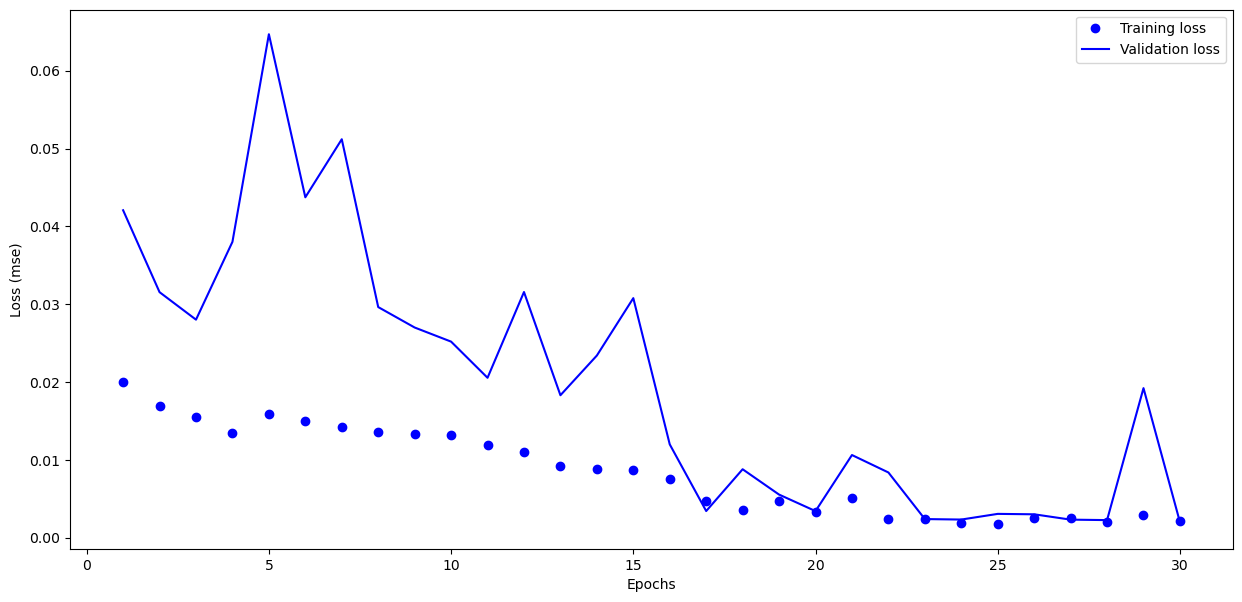

In [139]:
# print Loss for the neural network training process

history_dict = history_2.history

acc_values = history_dict['loss']
val_acc_values = history_dict['val_loss']
epochs = range(1, len(acc_values) + 1)

plt.figure(num=1, figsize=(15,7))
plt.plot(epochs, acc_values, 'bo', label='Training loss')
plt.plot(epochs, val_acc_values, 'b', label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (mse)')
plt.legend()

plt.show()

In [215]:
# You can use the code created above to type the next cell code

_________________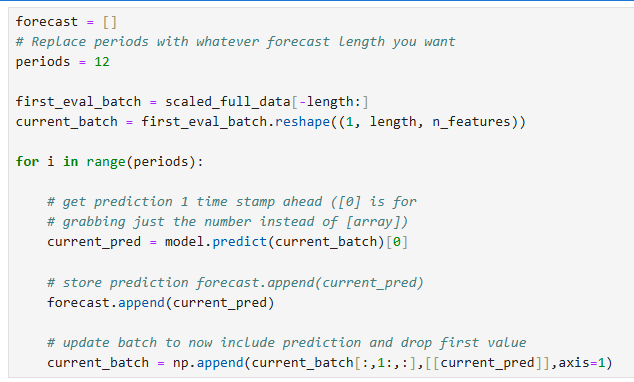

In [140]:
forecast=[]
periods=12
first_eval_batch=scaled_full_data[-length:]
current_batch= first_eval_batch.reshape((1, length, n_features))
for i in range(periods):
    current_pred=model2.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch=np.append(current_batch[:,1:,:],[[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 435ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 711ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


______________________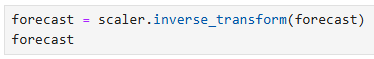

In [141]:
forecast= scaler.inverse_transform(forecast)
forecast

array([[17922.22484404],
       [21334.26890713],
       [24875.84156621],
       [23212.93701386],
       [25048.69859648],
       [23518.78926283],
       [23195.51255894],
       [23623.21855348],
       [22852.08638239],
       [24218.76867658],
       [27265.1819095 ],
       [38405.70681351]])

array([[18620.61448288],
       [20206.91406763],
       [22167.73939276],
       [21757.40348327],
       [23828.92585731],
       [22448.01823115],
       [22479.73978627],
       [23555.70857722],
       [21352.45454019],
       [22294.99097872],
       [25707.46347636],
       [37294.23667431]])

### Creating new timestamp index with pandas.

<html> <h4 style="font-style:italic; color:blue;"> Just run the 4 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [142]:
df

,Sales
observation_date,
1992-01-01,6938
1992-02-01,7524
1992-03-01,8475
1992-04-01,9401
1992-05-01,9558
...,...
2024-08-01,27215
2024-09-01,23088
2024-10-01,25318


In [143]:
forecast_index = pd.date_range(start='2025-01-01',periods=periods,freq='MS')

In [144]:
forecast_df = pd.DataFrame(data=forecast,index=forecast_index,
                           columns=['Forecast'])

In [145]:
forecast_df

,Forecast
2025-01-01,17922.224844
2025-02-01,21334.268907
2025-03-01,24875.841566
2025-04-01,23212.937014
2025-05-01,25048.698596
2025-06-01,23518.789263
2025-07-01,23195.512559
2025-08-01,23623.218553
2025-09-01,22852.086382
2025-10-01,24218.768677


__________________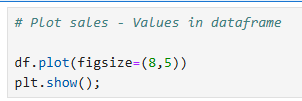

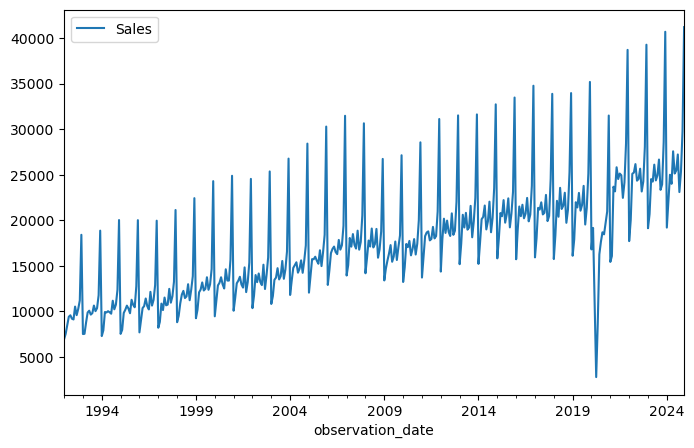

In [146]:
df.plot(figsize=(8,5))
plt.show()

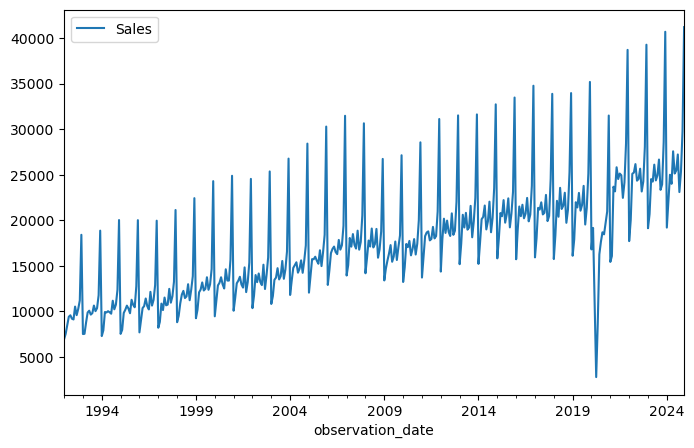

____________________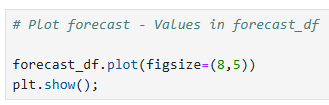

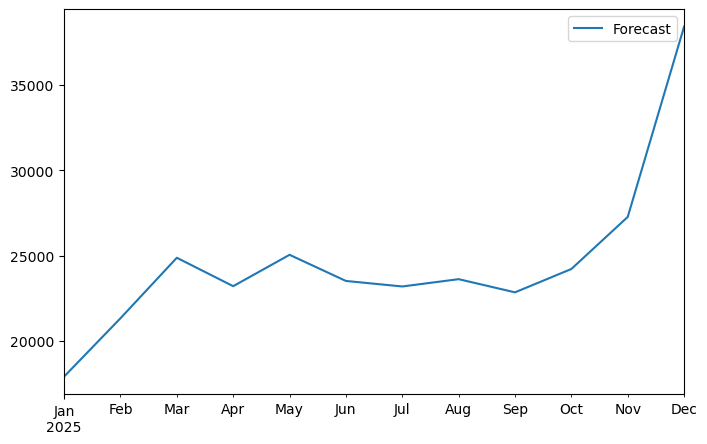

In [147]:
forecast_df.plot(figsize=(8,5))
plt.show()

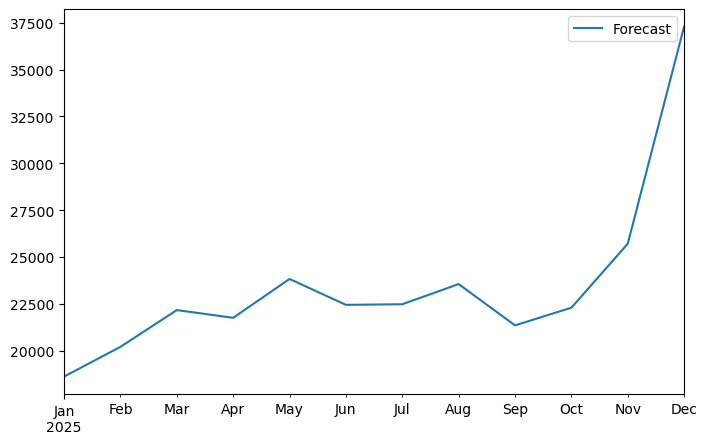

### Joining pandas plots

https://stackoverflow.com/questions/13872533/plot-different-dataframes-in-the-same-figure

________________________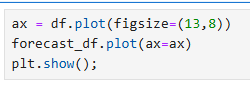

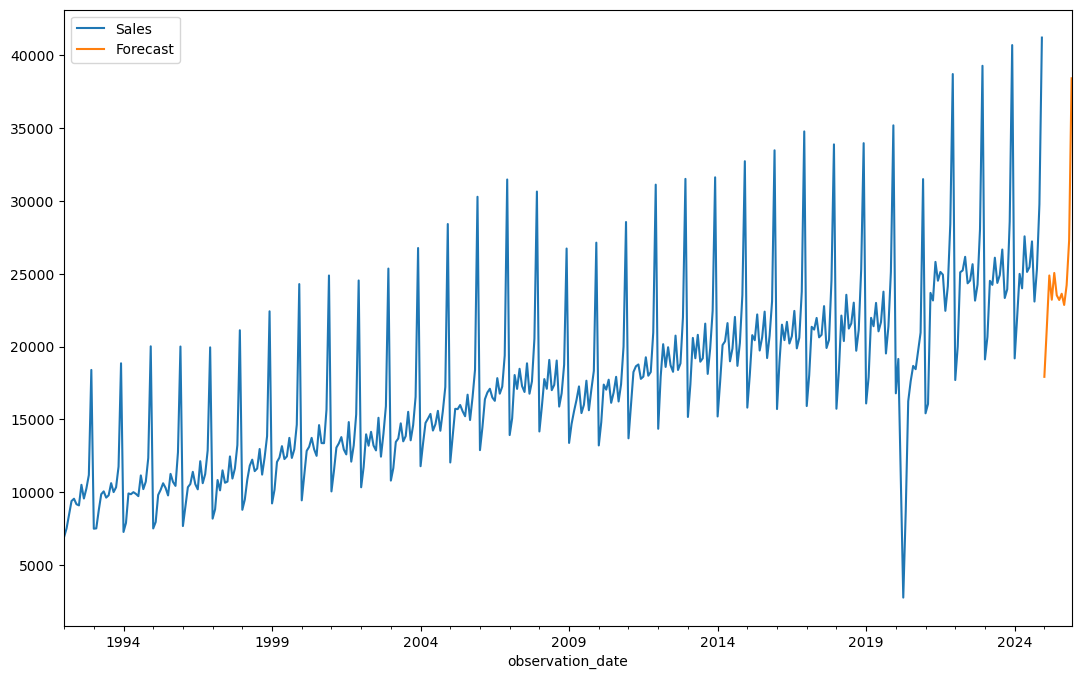

In [148]:
ax= df.plot(figsize=(13,8))
forecast_df.plot(ax=ax)
plt.show()

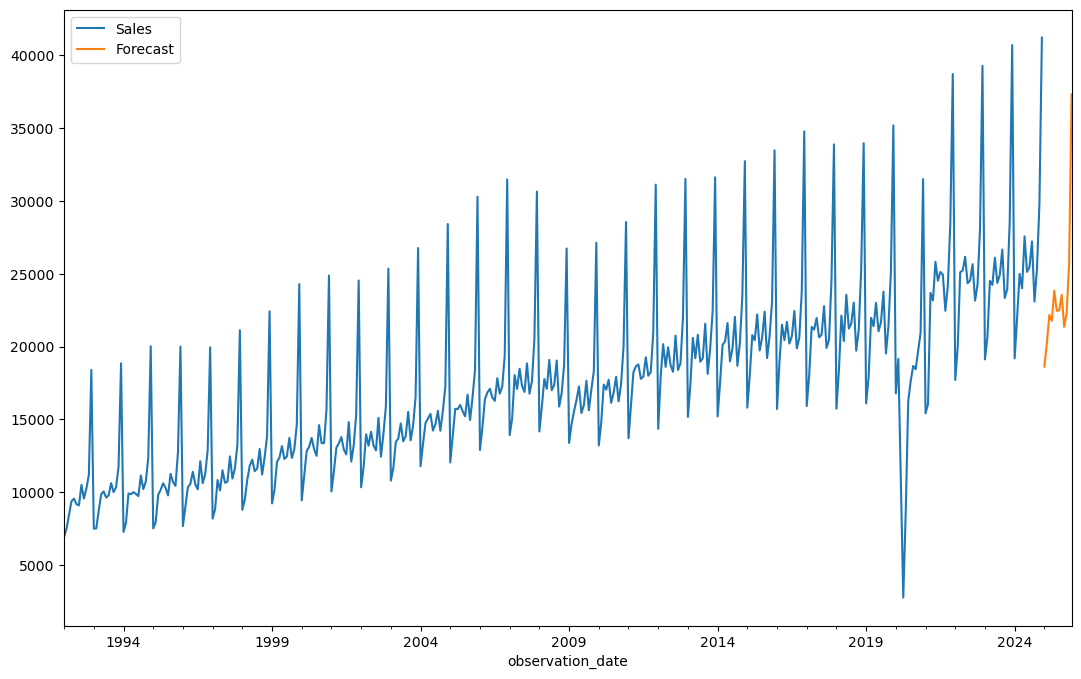

_______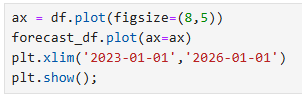

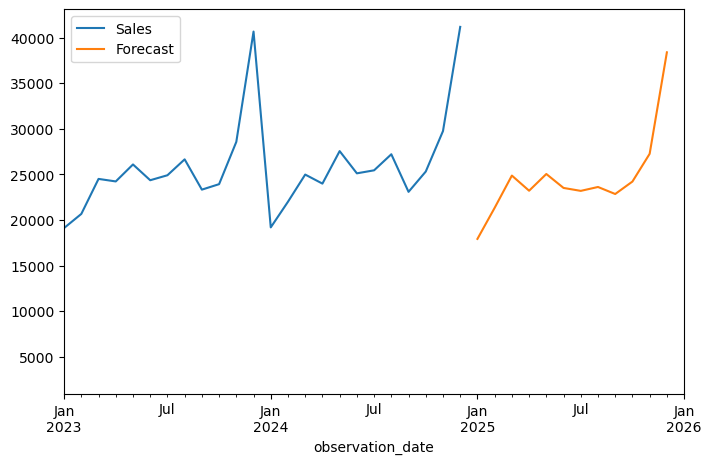

In [149]:
ax=df.plot(figsize=(8,5))
forecast_df.plot(ax=ax)
plt.xlim('2023-01-01', '2026-01-01')
plt.show()

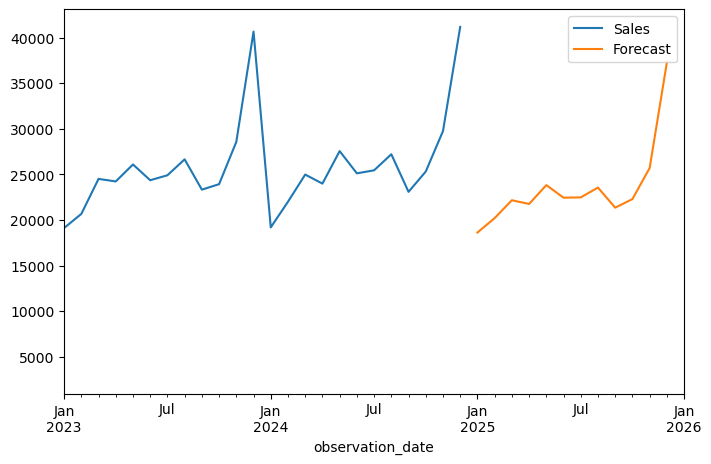

### Cecking Forecast for last 12 months

<html> <h4 style="font-style:italic; color:blue;"> Just run the 3 next cells using 'Ctrl' + 'Enter' </h4> </html>

In [150]:
forecast_index = pd.date_range(start='2024-01-01', periods=periods, freq='MS')
forecast_index

DatetimeIndex(['2024-01-01', '2024-02-01', '2024-03-01', '2024-04-01',
               '2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01',
               '2024-09-01', '2024-10-01', '2024-11-01', '2024-12-01'],
              dtype='datetime64[ns]', freq='MS')

In [151]:
forecast_df = pd.DataFrame(data=forecast, index=forecast_index,
                           columns=['Forecast'])

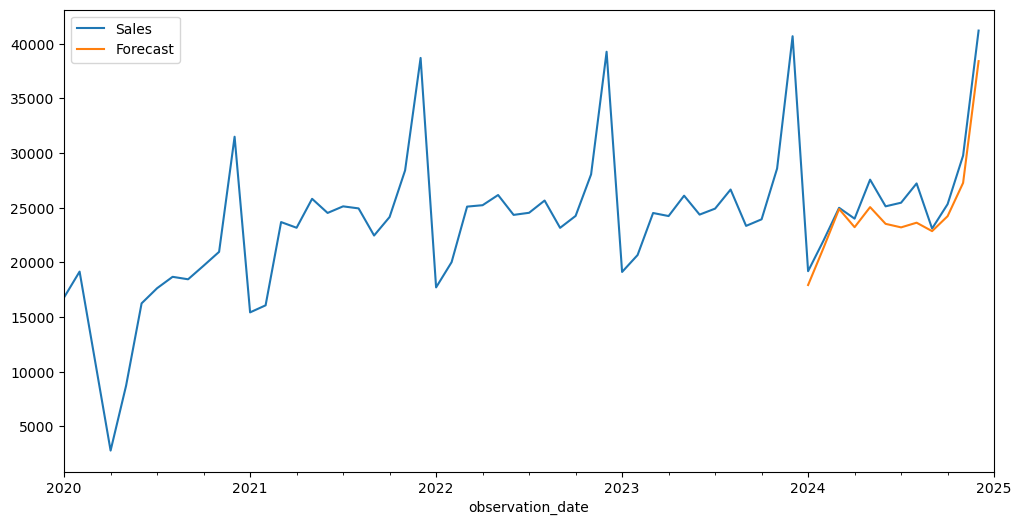

In [152]:
ax = df.plot(figsize=(12,6))
forecast_df.plot(ax=ax)
plt.xlim('2020-01-01','2025-01-01')
plt.show();

<html> <h2 style="font-style:bold; color:red;"> Lab Logbook requirements </h2> </html>

### 1. Plot of the 2nd model's summary

### 2. Copy your early-stop code and history_2 fit-training-process

### 3. Please record the plot of validation and test loss of history_2.

### 4. Based on this analysis, determine the optimal number of epochs for training your model. 

### Try the same example with a LSTM and GRU! (Optional)
Hint: Use LSTM instead of SimpleRNN!